## 01. 어떤 회사에서 생산한 suv 차종의 도시 연비가 높은지 알아보기 ##

### 1-1. mpg.csv 불러오기 ###

In [2]:
import pandas as pd
mpg = pd.read_csv('mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


*→ 234개의 행과 11개의 열(변수)로 이루어진 데이터 생성*

### 1-2. 회사 집단별 평균표 만들기 ###

In [9]:
suv = mpg.query('category == "suv"')
suv

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
21,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv
22,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv
...,...,...,...,...,...,...,...,...,...,...,...
176,toyota,4runner 4wd,3.4,1999,6,manual(m5),4,15,17,r,suv
177,toyota,4runner 4wd,4.0,2008,6,auto(l5),4,16,20,r,suv
178,toyota,4runner 4wd,4.7,2008,8,auto(l5),4,14,17,r,suv
198,toyota,land cruiser wagon 4wd,4.7,1999,8,auto(l4),4,11,15,r,suv


*→ 차종이 suv인 행만 추출하여 데이터 만들기*

In [11]:
df_suv = suv.groupby('manufacturer', as_index=False) \
            .agg(mean_cty = ('cty', 'mean'))
df_suv

,manufacturer,mean_cty
0,chevrolet,12.666667
1,dodge,11.857143
2,ford,12.888889
3,jeep,13.500000
4,land rover,11.500000
5,lincoln,11.333333
6,mercury,13.250000
7,nissan,13.750000
8,subaru,18.833333
9,toyota,14.375000


### 1-3. 평균 막대그래프 만들기 ###

In [22]:
df_suv = df_suv.sort_values('mean_cty', ascending=False).head(5)
df_suv

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000


*→ cty 평균이 높은 순서대로 정렬한 후 상위 5개 항목 저장하기*

<Axes: xlabel='manufacturer', ylabel='mean_cty'>

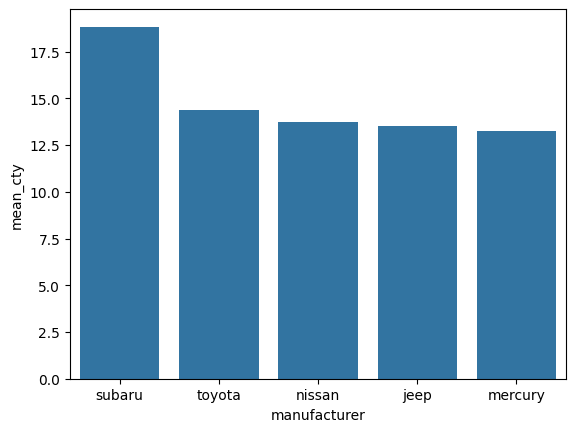

In [23]:
import seaborn as sns
sns.barplot(data = df_suv, x='manufacturer', y='mean_cty')

*→ suv 차종의 도시 연비가 가장 높은 회사는 ***subaru***이다.*

## 02. 자동차 중 어떤 category의 빈도가 많은지 알아보기 ##

### 2-1. category 집단별 빈도표 만들기 ###

In [18]:
df_category = mpg.groupby('category', as_index=False) \
                .agg(n = ('category', 'count'))
df_category

,category,n
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33
5,subcompact,35
6,suv,62


### 2-2. 빈도 막대그래프 만들기 ###

In [25]:
df_category = df_category.sort_values('n', ascending=False)
df_category

,category,n
6,suv,62
1,compact,47
2,midsize,41
5,subcompact,35
4,pickup,33
3,minivan,11
0,2seater,5


*→ category 빈도가 높은 순서대로 데이터 정렬하기*

<Axes: xlabel='category', ylabel='n'>

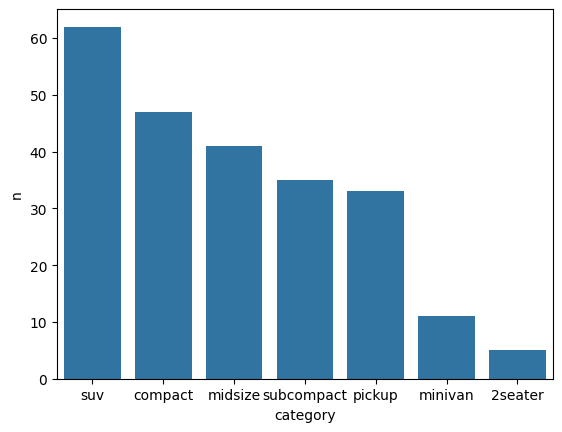

In [26]:
sns.barplot(data = df_category, x='category', y='n')

## 03. psavert가 시간에 따라 어떻게 변해 왔는지 알아보기 ##

### 1-2.   ###

*→  *

### 1-2.   ###

### 1-2.   ###